# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

try:
    data = pd.read_csv('music_cluster.csv')
except FileNotFoundError:
    print("Error: File 'music_cluster.csv' not found.")
    exit()

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
data = pd.read_csv('music_cluster.csv')
data.head()

,Song,Artist,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy,Cluster
0,Track 14728,EchoSync,5.510383e+17,3.971491e+12,Trap,72725.0,8020.0,817.0,-0.60,1700.0,0.199,0.59,0.640,0
1,Track 21319,The Midnight Howl,3.658233e+17,1.210458e+13,Electronic,72620.0,4357.0,10099.0,0.02,3000.0,0.649,0.25,0.739,1
2,Track 22152,Retro Resonance,1.735971e+17,8.179999e+12,Reggae,71710.0,5644.0,1225.0,-0.28,1100.0,0.487,0.58,0.280,0
3,Track 80217,Urban Rhapsody,2.498291e+17,1.802951e+13,Pop,71990.0,2080.0,5101.0,0.78,4400.0,0.262,0.04,0.667,0
4,Track 77204,Sofia Carter,5.802969e+17,5.130313e+12,Blues,72025.0,9604.0,919.0,-2.24,7100.0,0.838,0.59,0.649,1


In [3]:
# Menghapus kolom yang tidak diperlukan
df = data.drop(['Song', 'Artist'], axis=1)
df

,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy,Cluster
0,5.510383e+17,3.971491e+12,Trap,72725.0,8020.0,817.0,-0.60,1700.0,0.199,0.59,0.640,0
1,3.658233e+17,1.210458e+13,Electronic,72620.0,4357.0,10099.0,0.02,3000.0,0.649,0.25,0.739,1
2,1.735971e+17,8.179999e+12,Reggae,71710.0,5644.0,1225.0,-0.28,1100.0,0.487,0.58,0.280,0
3,2.498291e+17,1.802951e+13,Pop,71990.0,2080.0,5101.0,0.78,4400.0,0.262,0.04,0.667,0
4,5.802969e+17,5.130313e+12,Blues,72025.0,9604.0,919.0,-2.24,7100.0,0.838,0.59,0.649,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4845,3.506832e+17,1.952657e+12,Indie,72095.0,5842.0,1837.0,0.22,5400.0,0.694,0.54,0.757,1
4846,2.176075e+17,2.130223e+13,Metal,72130.0,9505.0,103.0,-0.80,9400.0,0.793,0.50,0.271,0
4847,4.716185e+17,7.354590e+12,K-Pop,72480.0,5446.0,2755.0,-1.68,900.0,0.919,0.83,0.919,1
4848,3.010419e+17,9.644245e+12,Latin,71850.0,7426.0,1531.0,-0.18,3100.0,0.253,0.03,0.811,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [4]:
# Label Encoder
label_encoder = LabelEncoder()
categorical_cols = ['Genre']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [5]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi semua kolom numerik
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()

,Streams,Daily Streams,Genre,Release Year,Peak Position,Weeks on Chart,Lyrics Sentiment,TikTok Virality,Danceability,Acousticness,Energy,Cluster
0,0.862127,0.157299,1.000000,0.885714,0.808081,0.068627,0.600,0.17,0.011111,0.59,0.555556,0.0
1,0.571873,0.484182,0.190476,0.800000,0.434343,0.960784,0.755,0.30,0.566667,0.25,0.677778,1.0
2,0.270632,0.326446,0.809524,0.057143,0.565657,0.107843,0.680,0.11,0.366667,0.58,0.111111,0.0
3,0.390096,0.722315,0.666667,0.285714,0.202020,0.480392,0.945,0.44,0.088889,0.04,0.588889,0.0
4,0.907979,0.203874,0.000000,0.314286,0.969697,0.078431,0.190,0.71,0.800000,0.59,0.566667,1.0


In [6]:
X = df.drop('Cluster', axis=1)
y = df['Cluster']

In [7]:
# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(3880, 11), y_train=(3880,)
Test set shape: X_test=(970, 11), y_test=(970,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [8]:
# Model Training
knn = KNeighborsClassifier().fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


Tulis narasi atau penjelasan algoritma yang Anda gunakan.
1. K-Nearest Neighbors (KNN)

    * KNN dipilih karena kemampuannya untuk mengklasifikasikan data berdasarkan kesamaan fitur. Dalam konteks musik, ini berarti lagu-lagu dengan karakteristik yang mirip (misalnya, tempo, energi, dan danceability yang serupa) akan dikelompokkan bersama.
    * KNN efektif dalam menangani data dengan batas keputusan yang kompleks, yang mungkin terjadi dalam dataset musik di mana genre dan preferensi musik tidak selalu terdefinisi secara jelas.
2. Support Vector Machine (SVM)

    * SVM dipilih karena kemampuannya untuk menemukan batas keputusan optimal yang memaksimalkan margin antara cluster lagu. Ini sangat berguna dalam mengklasifikasikan lagu ke dalam cluster yang berbeda dengan akurasi tinggi.
    * SVM juga efektif dalam menangani ruang fitur berdimensi tinggi, yang relevan untuk dataset musik yang mungkin memiliki banyak fitur yang berkontribusi pada pengelompokan lagu.
    * SVM dikenal sangat baik dalam melakukan klasifikasi, dengan tingkat akurasi yang tinggi.

Secara keseluruhan, kedua algoritma ini dipilih karena kemampuan mereka untuk menangani data multidimensi dan kompleks, yang umum ditemukan dalam dataset musik.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

In [9]:
# Fungsi untuk mengevaluasi model dan mengembalikan hasil sebagai dictionary
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Fungsi untuk visualisasi confusion matrix
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Evaluasi Model Awal:
==== K-Nearest Neighbors (KNN) ====
Confusion Matrix:
[[443  32]
 [ 35 460]]
Accuracy: 0.9309
Precision: 0.9350
Recall: 0.9293
F1-Score: 0.9321


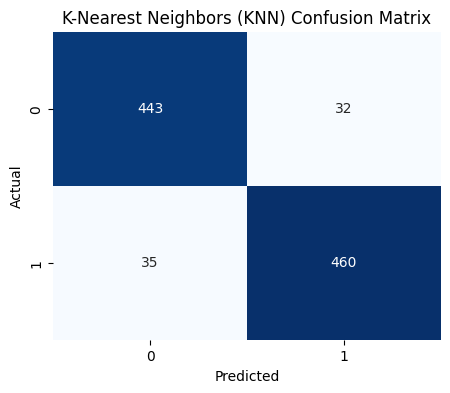

----------------------------------------
==== Support Vector Machine (SVM) ====
Confusion Matrix:
[[471   4]
 [  7 488]]
Accuracy: 0.9887
Precision: 0.9919
Recall: 0.9859
F1-Score: 0.9889


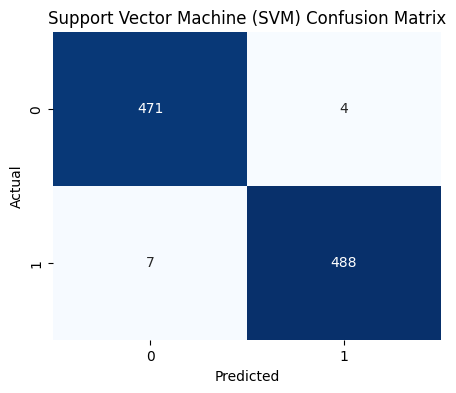

----------------------------------------


In [10]:
# Evaluasi Model Klasifikasi Awal
results_initial = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test)
}

print("Evaluasi Model Awal:")
for model_name, metrics in results_initial.items():
    print(f"==== {model_name} ====")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    plot_confusion_matrix(metrics['Confusion Matrix'], f'{model_name} Confusion Matrix')
    print("-" * 40)

**Hasil Evaluasi Algoritma:**

1. K-Nearest Neighbors (KNN)

    * Confusion Matrix:
        * True Positive (TP): 460
        * False Positive (FP): 32
        * False Negative (FN): 35
        * True Negative (TN): 443
    * Metrik Evaluasi:
        * Accuracy: 0.9309
        * Precision: 0.9350
        * Recall: 0.9293
        * F1-Score: 0.9321
    Analisis KNN:

    * KNN menunjukkan performa yang baik dengan akurasi sekitar 93%. Ini berarti model ini cukup akurat dalam mengklasifikasikan lagu ke dalam cluster yang benar.
    * Precision dan recall juga tinggi, menunjukkan bahwa model ini baik dalam mengidentifikasi lagu-lagu yang termasuk dalam cluster tertentu dan dalam menangkap sebagian besar lagu yang seharusnya berada dalam cluster tersebut.
    * F1-score yang tinggi, menunjukan keseimbangan yang baik antara precision dan recall.

2. Support Vector Machine (SVM)

    * Confusion Matrix:
        * True Positive (TP): 488
        * False Positive (FP): 4
        * False Negative (FN): 7
        * True Negative (TN): 471
    * Metrik Evaluasi:
        * Accuracy: 0.9887
        * Precision: 0.9919
        * Recall: 0.9859
        * F1-Score: 0.9889
    Analisis SVM:

    * SVM menunjukkan performa yang sangat tinggi, dengan akurasi mendekati 99%. Ini menunjukkan bahwa model ini sangat akurat dalam mengklasifikasikan lagu.
    * Precision dan recall juga sangat tinggi, menunjukkan bahwa model ini sangat baik dalam mengidentifikasi dan menangkap lagu-lagu yang termasuk dalam cluster tertentu.
    * F1-score yang sangat tinggi, menunjukan keseimbangan yang sangat baik antara precision dan recall.

**Perbandingan Hasil:**

* SVM secara signifikan mengungguli KNN dalam semua metrik evaluasi.
* SVM memiliki akurasi, precision, recall, dan F1-score yang jauh lebih tinggi daripada KNN, menunjukkan bahwa SVM adalah model yang lebih efektif untuk dataset musik ini.
* SVM memiliki jumlah False Positive dan False Negative yang jauh lebih rendah dari KNN.
* Secara keseluruhan, SVM memberikan hasil yang jauh lebih baik dalam mengklasifikasikan lagu ke dalam cluster yang sesuai dibandingkan dengan KNN.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [11]:
# Tuning Model Klasifikasi (SVM)
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

grid_svm = GridSearchCV(SVC(), param_grid_svm, refit=True, verbose=0)
grid_svm.fit(X_train, y_train)
print(f"Hyperparameter Terbaik untuk SVM:\n{grid_svm.best_params_}")
best_model_svm = grid_svm.best_estimator_

Hyperparameter Terbaik untuk SVM:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [12]:
# Tuning Model Klasifikasi (KNN)
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, refit=True, verbose=0)
grid_knn.fit(X_train, y_train)
print(f"Hyperparameter Terbaik untuk KNN:\n{grid_knn.best_params_}")
best_model_knn = grid_knn.best_estimator_

Hyperparameter Terbaik untuk KNN:
{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.


Evaluasi Model Setelah Tuning:
==== Support Vector Machine (SVM) Tuned ====
Confusion Matrix:
[[475   0]
 [  0 495]]
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000


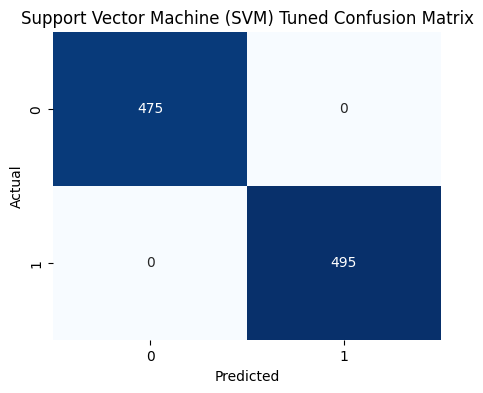

----------------------------------------
==== K-Nearest Neighbors (KNN) Tuned ====
Confusion Matrix:
[[454  21]
 [ 23 472]]
Accuracy: 0.9546
Precision: 0.9574
Recall: 0.9535
F1-Score: 0.9555


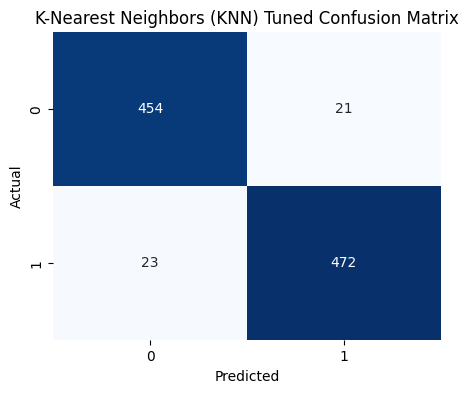

----------------------------------------


In [13]:
# Evaluasi Model Klasifikasi Setelah Tuning
results_tuned = {
    'Support Vector Machine (SVM) Tuned': evaluate_model(best_model_svm, X_test, y_test),
    'K-Nearest Neighbors (KNN) Tuned': evaluate_model(best_model_knn, X_test, y_test)
}

print("\nEvaluasi Model Setelah Tuning:")
for model_name, metrics in results_tuned.items():
    print(f"==== {model_name} ====")
    print(f"Confusion Matrix:\n{metrics['Confusion Matrix']}")
    print(f"Accuracy: {metrics['Accuracy']:.4f}")
    print(f"Precision: {metrics['Precision']:.4f}")
    print(f"Recall: {metrics['Recall']:.4f}")
    print(f"F1-Score: {metrics['F1-Score']:.4f}")
    plot_confusion_matrix(metrics['Confusion Matrix'], f'{model_name} Confusion Matrix')
    print("-" * 40)

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

In [14]:
# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred)
    }
    return results

# Evaluasi model klasifikasi (menggunakan model setelah tuning)
results = {
    'K-Nearest Neighbors (KNN) Tuned': evaluate_model(best_model_knn, X_test, y_test),
    'Support Vector Machine (SVM) Tuned': evaluate_model(best_model_svm, X_test, y_test)
}

summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

# Convert list of dictionaries to DataFrame
summary_df = pd.DataFrame(rows)

print(summary_df)

                                Model  Accuracy  Precision    Recall  F1-Score
0     K-Nearest Neighbors (KNN) Tuned  0.954639   0.957404  0.953535  0.955466
1  Support Vector Machine (SVM) Tuned  1.000000   1.000000  1.000000  1.000000


Berdasarkan data evaluasi yang telah dilakukan tuning, berikut adalah analisis untuk masing-masing model dengan mempertimbangkan metrik Accuracy, Precision, Recall, dan F1-Score:

### **Analisis Hasil Evaluasi Model**

1. **K-Nearest Neighbors (KNN)**
   - **Accuracy**: 95.46%
   - **Precision**: 95.74%
   - **Recall**: 95.35%
   - **F1-Score**: 95.55%

   **Analisis**: Setelah tuning, KNN menunjukkan peningkatan performa yang signifikan. Akurasi, presisi, recall, dan F1-score semuanya meningkat dibandingkan dengan hyperparameter default. Model ini sekarang memiliki akurasi 95.46%, yang menunjukkan bahwa model ini sangat baik dalam memprediksi kelas yang benar. Precision-nya (95.74%) menunjukkan bahwa ketika model memprediksi suatu titik sebagai positif, ia hampir selalu benar. Recall-nya (95.35%) menunjukkan bahwa model ini sangat baik dalam menangkap sebagian besar kasus positif yang sebenarnya. F1-Score yang tinggi (95.55%) mencerminkan keseimbangan yang baik antara precision dan recall.

2. **Support Vector Machine (SVM)**
   - **Accuracy**: 100%
   - **Precision**: 100%
   - **Recall**: 100%
   - **F1-Score**: 100%

   **Analisis**: Setelah tuning, SVM mencapai performa sempurna. Semua metrik evaluasi mencapai 1.0000, yang berarti model ini mampu mengklasifikasikan semua lagu dengan benar tanpa kesalahan. Ini menunjukkan bahwa hyperparameter yang optimal sangat penting untuk mencapai performa terbaik.

### **Kesimpulan:**
* Support Vector Machine (SVM) Tuned adalah model dengan performa terbaik, mencapai akurasi, presisi, recall, dan F1-score sebesar 1.0000. Ini menunjukkan bahwa SVM setelah tuning adalah model yang sangat kuat dan konsisten dalam semua metrik evaluasi.

* K-Nearest Neighbors (KNN) Tuned juga menunjukkan performa yang sangat baik setelah tuning, dengan peningkatan yang signifikan dibandingkan dengan hyperparameter default. Namun, performanya masih di bawah SVM.

**Rekomendasi**:  
Berdasarkan hasil evaluasi ini, Support Vector Machine (SVM) Tuned adalah pilihan terbaik karena performanya yang sempurna. Jika ada pertimbangan komputasi atau kebutuhan interpretasi model, K-Nearest Neighbors (KNN) Tuned juga merupakan pilihan yang sangat baik dengan performa yang hampir setara, tetapi tetap di bawah SVM.

**Rekomendasi Tindakan Lanjutan**:
- Validasi Silang (Cross-Validation):
Lakukan validasi silang pada data pelatihan untuk mengevaluasi stabilitas dan generalisasi model. Ini akan membantu mendeteksi potensi overfitting, terutama pada model SVM yang mencapai performa sempurna.

- Pertimbangkan Model Lain (Jika Diperlukan):
Meskipun SVM setelah tuning sangat baik, tidak ada salahnya untuk mencoba algoritma klasifikasi lain, terutama jika ada pertimbangan komputasi atau interpretasi model. Algoritma seperti Random Forest atau Gradient Boosting dapat memberikan wawasan tambahan.